In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
online = pd.read_csv('E:\Marketing, Advertising & Data Science\Python, SQL & R projects\Online Retail_SAMPLE DATA FOR COHORT ANALYSIS PRACTICE.csv', encoding = "ISO-8859-1")

In [3]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [4]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [5]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [7]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [13]:
grouping1 = online.groupby('CustomerID')['InvoiceMonth']
grouping1.head()

0        2010-01-01
1        2010-01-01
2        2010-01-01
3        2010-01-01
4        2010-01-01
            ...    
541768   2011-09-01
541769   2011-09-01
541770   2011-09-01
541771   2011-09-01
541772   2011-09-01
Name: InvoiceMonth, Length: 21206, dtype: datetime64[ns]

In [9]:
online['CohortMonth'] = grouping1.transform('min')

In [10]:
print(online.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [11]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01


In [14]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [15]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')

In [16]:
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [17]:
years_diff = invoice_year - cohort_year

In [18]:
months_diff = invoice_month - cohort_month

In [19]:
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0


In [20]:
grouping_count = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping_count['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
print(cohort_counts.head())

CohortIndex   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  ...  \
CohortMonth                                                               ...   
2010-01-01    98.0   9.0   4.0   NaN   7.0   7.0   4.0  10.0  10.0   5.0  ...   
2010-02-01   108.0   2.0   NaN   NaN   3.0   7.0   5.0  12.0   5.0   NaN  ...   
2010-03-01    49.0   NaN   1.0   1.0   1.0   2.0   5.0   NaN   NaN  14.0  ...   
2010-05-01    68.0   3.0   3.0   2.0   3.0   1.0   NaN  24.0  32.0  20.0  ...   
2010-06-01    76.0   2.0   4.0   4.0   1.0   NaN  26.0  29.0  25.0  25.0  ...   

CohortIndex  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  
CohortMonth                                                              
2010-01-01   38.0  40.0  36.0  44.0  41.0  37.0  41.0  44.0  40.0  23.0  
2010-02-01   39.0  38.0  43.0  48.0  34.0  41.0  45.0  53.0  19.0   NaN  
2010-03-01   23.0  16.0  19.0  19.0  13.0  24.0  23.0   9.0   NaN   NaN  
2010-05-01   30.0  32.0  31.0  33.0  40.0  20.0   NaN   NaN   

In [21]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention.index = retention.index.strftime('%m-%Y')

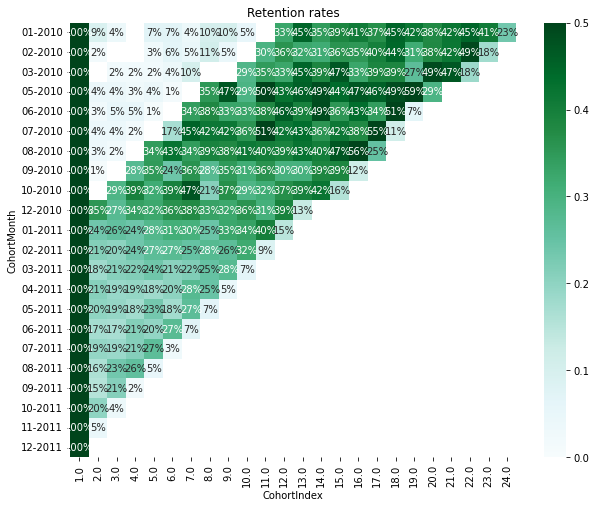

In [22]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()